## Santander Customer Satisfaction

## Overview

The dataset was from a kaggle competition of Santander Customer Satisfaction which contains 370 features of 76020 customers which weredevided into two classes, '1' denotes unsatified customer and '0' denotes satified customer, the object is to identified the relationship between features and satisfaction in order to develope an algorithm of identifing customer satisfactions based on features of customers.

Roadmap:

1. Exploratory Data Analysis
2. Dimentionality reduction 
3. Resampling Data
4. Filtering outliers
5. Train-test split
6. Modeling: XGBoost Classifier - Fit model with early-stopping 
   

In [88]:
import sys
import pandas as pd
import numpy as np 
import scipy
import IPython
import sklearn

In [89]:
# Update to python 3.6.5 on Aug 26, 2018

print('python version: {}'.format(sys.version))
print('pandas version: {}'.format(pd.__version__))
print('numpy version: {}'.format(np.__version__))
print('scipy version: {}'.format(scipy.__version__))
print('Ipython version: {}'.format(scipy.__version__))
print('sklearn version: {}'.format(scipy.__version__))

python version: 2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:05) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.23.4
numpy version: 1.15.1
scipy version: 1.1.0
Ipython version: 1.1.0
sklearn version: 1.1.0


In [90]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [91]:
import os

os.getcwd()

'/Users/shangluntsai/Projects/public/Santander_Customer_Satisfaction'

In [92]:
fname = os.path.expanduser('~/Projects/public/datasets/santander/train.csv')
funseen = os.path.expanduser('~/Projects/public/datasets/santander/test.csv')

In [93]:
df = pd.read_csv(fname) 
dfv = pd.read_csv(funseen)

## Exploratory Data Analysis

In [94]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [95]:
dir(df)

['ID',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [96]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [97]:
cols = list(df.columns.values)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [99]:
typedf = df.dtypes.reset_index()
typedf.columns = ['Count', 'Data Type']
typedf.groupby('Data Type').aggregate('count').reset_index()

,Data Type,Count
0,int64,260
1,float64,111


In [100]:
# Replacing NaN value with 0

df = df.fillna(0)
dfv = dfv.fillna(0)

In [101]:
# Balanced or not

dft = pd.DataFrame(df['TARGET'].value_counts())
dft['Percentage'] = 100*dft['TARGET']/df.shape[0]

dft[['TARGET', 'Percentage']]

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


#### Data is imbalanced with only 3.96% of data labeled as '1' (unsatisfied customer) and all the rest labeled as '0' (satisfied customer)

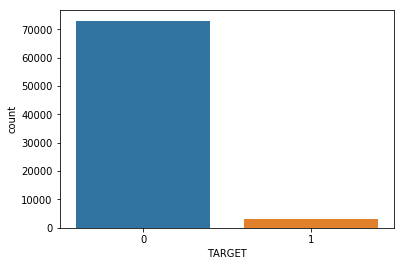

In [102]:
%matplotlib inline

import seaborn as sb

sb.countplot(x="TARGET", data=df)

In [103]:
import matplotlib.pyplot as plt

unsatisfied = df[df["TARGET"]==1]
satisfied = df[df["TARGET"]==0]

#### plotiing distributions of var38 in two classes

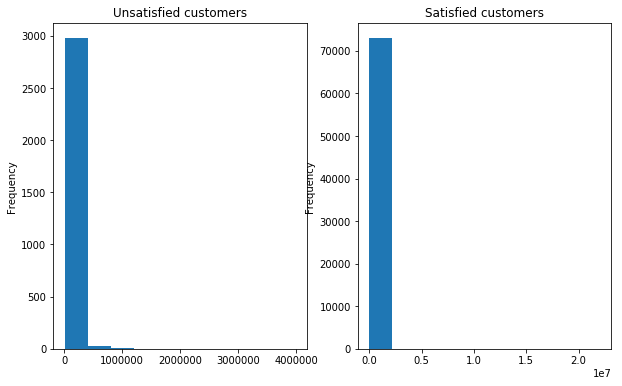

In [104]:
plt.figure(figsize=(10,6))
plt.subplot(121)
unsatisfied.var38.plot.hist(title="Unsatisfied customers")
plt.subplot(122)
satisfied.var38.plot.hist(title="Satisfied customers")

#### plotiing distributions var3 in two classes

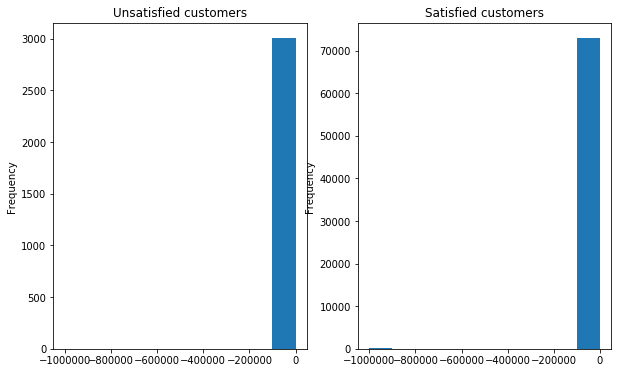

In [107]:
plt.figure(figsize=(10,6))
plt.subplot(121)
unsatisfied.var3.plot.hist(title="Unsatisfied customers")
plt.subplot(122)
satisfied.var3.plot.hist(title="Satisfied customers")

#### plotiing distributions var15 in two classes

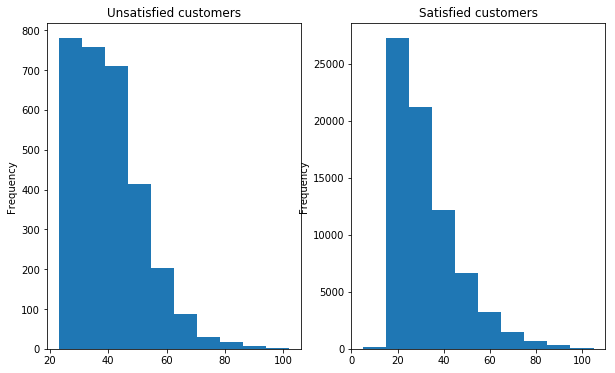

In [110]:
plt.figure(figsize=(10,6))
plt.subplot(121)
unsatisfied.var15.plot.hist(title="Unsatisfied customers")
plt.subplot(122)
satisfied.var15.plot.hist(title="Satisfied customers")

#### plotiing distributions num_var4 in two classes

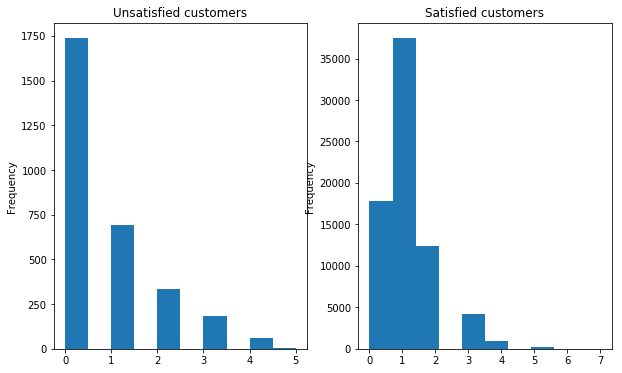

In [113]:
plt.figure(figsize=(10,6))
plt.subplot(121)
unsatisfied.num_var4.plot.hist(title="Unsatisfied customers")
plt.subplot(122)
satisfied.num_var4.plot.hist(title="Satisfied customers")

#### plotiing distributions saldo_medio_var5_ult3 in two classes

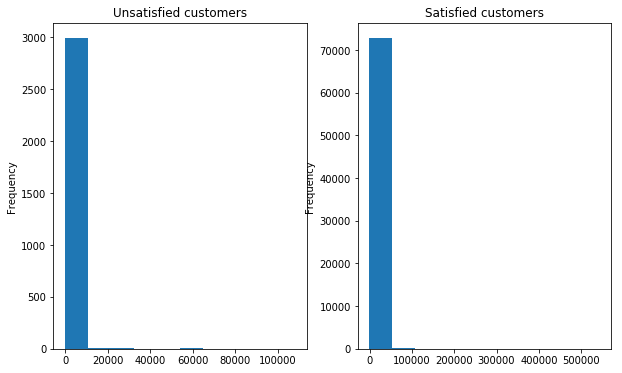

In [116]:
plt.figure(figsize=(10,6))
plt.subplot(121)
unsatisfied.saldo_medio_var5_ult3.plot.hist(title="Unsatisfied customers")
plt.subplot(122)
satisfied.saldo_medio_var5_ult3.plot.hist(title="Satisfied customers")

#### plotiing distributions num_var45_hace2 in two classes

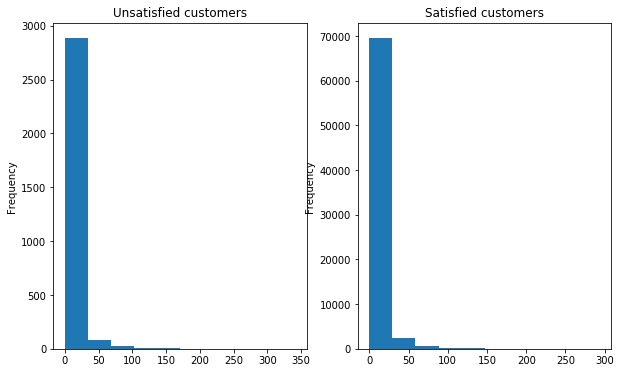

In [119]:
plt.figure(figsize=(10,6))
plt.subplot(121)
unsatisfied.num_var45_hace2.plot.hist(title="Unsatisfied customers")
plt.subplot(122)
satisfied.num_var45_hace2.plot.hist(title="Satisfied customers")

## Data Pre-processing

Add a column "zeroCount" to datasets

In [122]:
# Add a column "zeroCount" to datasets

features = df.columns[1:-1]

df.insert(1, 'zeroCount', (df[features] == 0).astype(int).sum(axis=1))
dfv.insert(1, 'zeroCount', (dfv[features] == 0).astype(int).sum(axis=1))

In [123]:
df.head()

,ID,zeroCount,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,355,2,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,329,2,34,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,340,2,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,309,2,37,0.0,195.0,195.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,319,2,39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


 Remove duplicated columns 

In [124]:
# Remove duplicated columns 

drop_cols = []
cols = df.columns

for i in range(2, len(cols) - 1):   # iterate from 3rd column
    val = df[cols[i]].values
    for j in range(i+1, len(cols)):
        if np.array_equal(val, df[cols[j]].values):
            drop_cols.append(cols[j])

In [125]:
df.drop(drop_cols, axis=1, inplace=True)
dfv.drop(drop_cols, axis=1, inplace=True)

Remove insignificant columns - zero standard deviation

In [126]:
# Removing insignificant columns - zero standard deviation

drop_cols = []
cols = df.columns

for col in df.columns:
    if df[col].std() == 0:
        drop_cols.append(col)

In [127]:
df.drop(drop_cols, axis=1, inplace=True)
dfv.drop(drop_cols, axis=1, inplace=True)

### Data Re-sampling - Under Sampling

As the unsatisfied customers count only 3.69% of the entire dataset, we re-sample the satisfied customers make by randomly choose equal number of the unsatisfied customer.

In [134]:
# Thanks to Kaggle user Manish Kumar's kernel

unsatisfied_count = len(df[df["TARGET"]==1])
satisfied_count = len(df[df["TARGET"]==0])

unsatisfied_idx = np.array(df[df["TARGET"]==1].index)
satisfied_idx = np.array(df[df["TARGET"]==0].index)


In [135]:
# Randomly under sampling major class for same size to minor class in the training dataset (train.csv)

def under_sampling(data, minor_idx, major_idx, minor_count, target):
    major_idx_undersampled = np.array(np.random.choice(major_idx, minor_count, replace=False))
    undersample_idx = np.concatenate([minor_idx, major_idx_undersampled])
    undersample_df = data.iloc[undersample_idx, :]
    
    print("Number of unsatisfied customers: {}".format(len(undersample_df[undersample_df[target]==1])))
    print("Number of satisfied customers: {}".format(len(undersample_df[undersample_df[target]==0])))
    print("Size of dataset after resampling: {}".format(len(undersample_df)))
    return(undersample_df)

In [136]:
# Training data after re-sampling

undersample_df = under_sampling(df, unsatisfied_idx, satisfied_idx, unsatisfied_count, target="TARGET")

Number of unsatisfied customers: 3008
Number of satisfied customers: 3008
Size of dataset after resampling: 6016


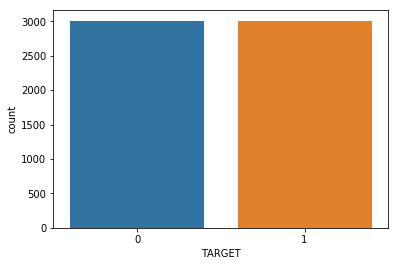

In [137]:
# A balanced training data
%matplotlib inline
import seaborn as sb

sb.countplot(x="TARGET", data=undersample_df)

In [138]:
# Randomly under sampling major class for same size to minor class in the unseen dataset (test.csv)

def under_sampling_unseen(data, sample_count):
    undersample_idx = np.array(np.random.choice(data.index, sample_count, replace=False))
    undersample_dfu = data.iloc[undersample_idx, :]

    print("Size of unseen dataset after resampling: {}".format(len(undersample_dfu)))
    return(undersample_dfu)

In [139]:
# Unseen data (test.csv) after re-sampling

undersample_dfv = under_sampling_unseen(dfv, unsatisfied_count*2)

Size of unseen dataset after resampling: 6016


### Train-Test Split

Split training data into training set and test set in propotion of 70% : 30% 

In [147]:
# spliting train.csv into feature data and target data

feature = undersample_df.iloc[:, 1:-1]    
target = undersample_df.iloc[:, undersample_df.columns == "TARGET"] 

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3)

In [148]:
print("Size of training data: {}".format(len(feature_train)))

Size of training data: 4211


In [149]:
print("Size of test data: {}".format(len(feature_test)))

Size of test data: 1805


In [150]:
feature_train.head()

,zeroCount,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
66799,337,2,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85095.93
70178,353,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83296.26
27170,333,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37064.46
41138,353,2,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65934.57
25692,355,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150753.60


In [151]:
feature_test.head()

,zeroCount,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
18537,340,2,25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33094.680000
37700,334,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39607.950000
61566,353,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
43362,290,2,48,0.0,1886.25,1886.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
19699,328,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130884.000000


## Building Machine Learning Models

### Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(feature_train, target_train)

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
accuracy_random_forest = round(random_forest.score(feature_train, target_train) * 100, 2)
print(round(accuracy_random_forest, 2,), "%")

(98.86, '%')


### Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(feature_train, target_train)

#Y_pred = decision_tree.predict(feature_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [155]:
accuracy_decision_tree = round(decision_tree.score(feature_train, target_train) * 100, 2)
print(round(accuracy_decision_tree,2,), "%")

(98.86, '%')


### Linear Support Vector Machine

In [156]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(feature_train, target_train)

#target_pred = linear_svc.predict(feature_test)

/anaconda3/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [157]:
acc_linear_svc = round(linear_svc.score(feature_train, target_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

(52.72, '%')


### Naive Bayes

In [158]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(feature_train, target_train)

#target_pred = gaussian.predict(feature_test)

/anaconda3/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [159]:
acc_naive_bayes = round(gaussian.score(feature_train, target_train) * 100, 2)
print(round(acc_naive_bayes,2,), "%")

(52.89, '%')


### K-Nearest Neighbors

In [160]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(feature_train, target_train)

#target_pred = knn.predict(feature_test)

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [161]:
acc_knn = round(knn.score(feature_train, target_train) * 100, 2)
print(round(acc_knn,2,), "%")

(79.34, '%')


### Stochastic Gradient Descent 

In [162]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(feature_train, target_train)

#target_pred = sgd.predict(feature_test)

/anaconda3/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [163]:
sgd.score(feature_train, target_train)
accuracy_sgd = round(sgd.score(feature_train, target_train) * 100, 2)
print(round(accuracy_sgd, 2, ), "%")

(54.95, '%')


### Perceptron

In [164]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(feature_train, target_train)

#target_pred = perceptron.predict(feature_test)

/anaconda3/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [165]:
accuracy_perceptron = round(perceptron.score(feature_train, target_train) * 100, 2)
print(round(accuracy_perceptron,2,), "%")

(55.85, '%')


### Feature Importantce 

In [166]:
importances = pd.DataFrame({'feature':feature_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False) 

In [167]:
# Top 10 important features

importances.head(10)

,feature,importance
2,var15,0.206
306,var38,0.195
271,saldo_medio_var5_ult3,0.044
269,saldo_medio_var5_hace3,0.040
0,zeroCount,0.028
144,saldo_var30,0.026
270,saldo_medio_var5_ult1,0.023
268,saldo_medio_var5_hace2,0.023
129,saldo_var5,0.023
151,saldo_var42,0.023


## Pearson Correlations

##### Visualize the correation of top-10 features

In [170]:
corr_cols = ['var15','var38','saldo_medio_var5_ult3','saldo_medio_var5_hace3', 'zeroCount', \
             'saldo_var30', 'saldo_medio_var5_ult1', 'saldo_medio_var5_hace2', 'saldo_var5', 'saldo_var42']

df_corr = feature_train[corr_cols]

corr = df_corr.corr()
corr

,var15,var38,saldo_medio_var5_ult3,saldo_medio_var5_hace3,zeroCount,saldo_var30,saldo_medio_var5_ult1,saldo_medio_var5_hace2,saldo_var5,saldo_var42
var15,1.000000,-0.011159,0.092144,0.069859,-0.126492,0.166405,0.078079,0.104269,0.080976,0.146835
var38,-0.011159,1.000000,0.582751,0.367030,-0.012341,0.098045,0.572637,0.468112,0.587721,0.144144
saldo_medio_var5_ult3,0.092144,0.582751,1.000000,0.411704,-0.104230,0.362903,0.922948,0.834639,0.830197,0.390535
saldo_medio_var5_hace3,0.069859,0.367030,0.411704,1.000000,-0.074735,0.361589,0.326714,0.488947,0.322555,0.453510
zeroCount,-0.126492,-0.012341,-0.104230,-0.074735,1.000000,-0.177030,-0.089001,-0.116789,-0.077770,-0.155212
saldo_var30,0.166405,0.098045,0.362903,0.361589,-0.177030,1.000000,0.195425,0.546462,0.152443,0.818877
saldo_medio_var5_ult1,0.078079,0.572637,0.922948,0.326714,-0.089001,0.195425,1.000000,0.682516,0.889204,0.283391
saldo_medio_var5_hace2,0.104269,0.468112,0.834639,0.488947,-0.116789,0.546462,0.682516,1.000000,0.629393,0.496570
saldo_var5,0.080976,0.587721,0.830197,0.322555,-0.077770,0.152443,0.889204,0.629393,1.000000,0.223885
saldo_var42,0.146835,0.144144,0.390535,0.453510,-0.155212,0.818877,0.283391,0.496570,0.223885,1.000000


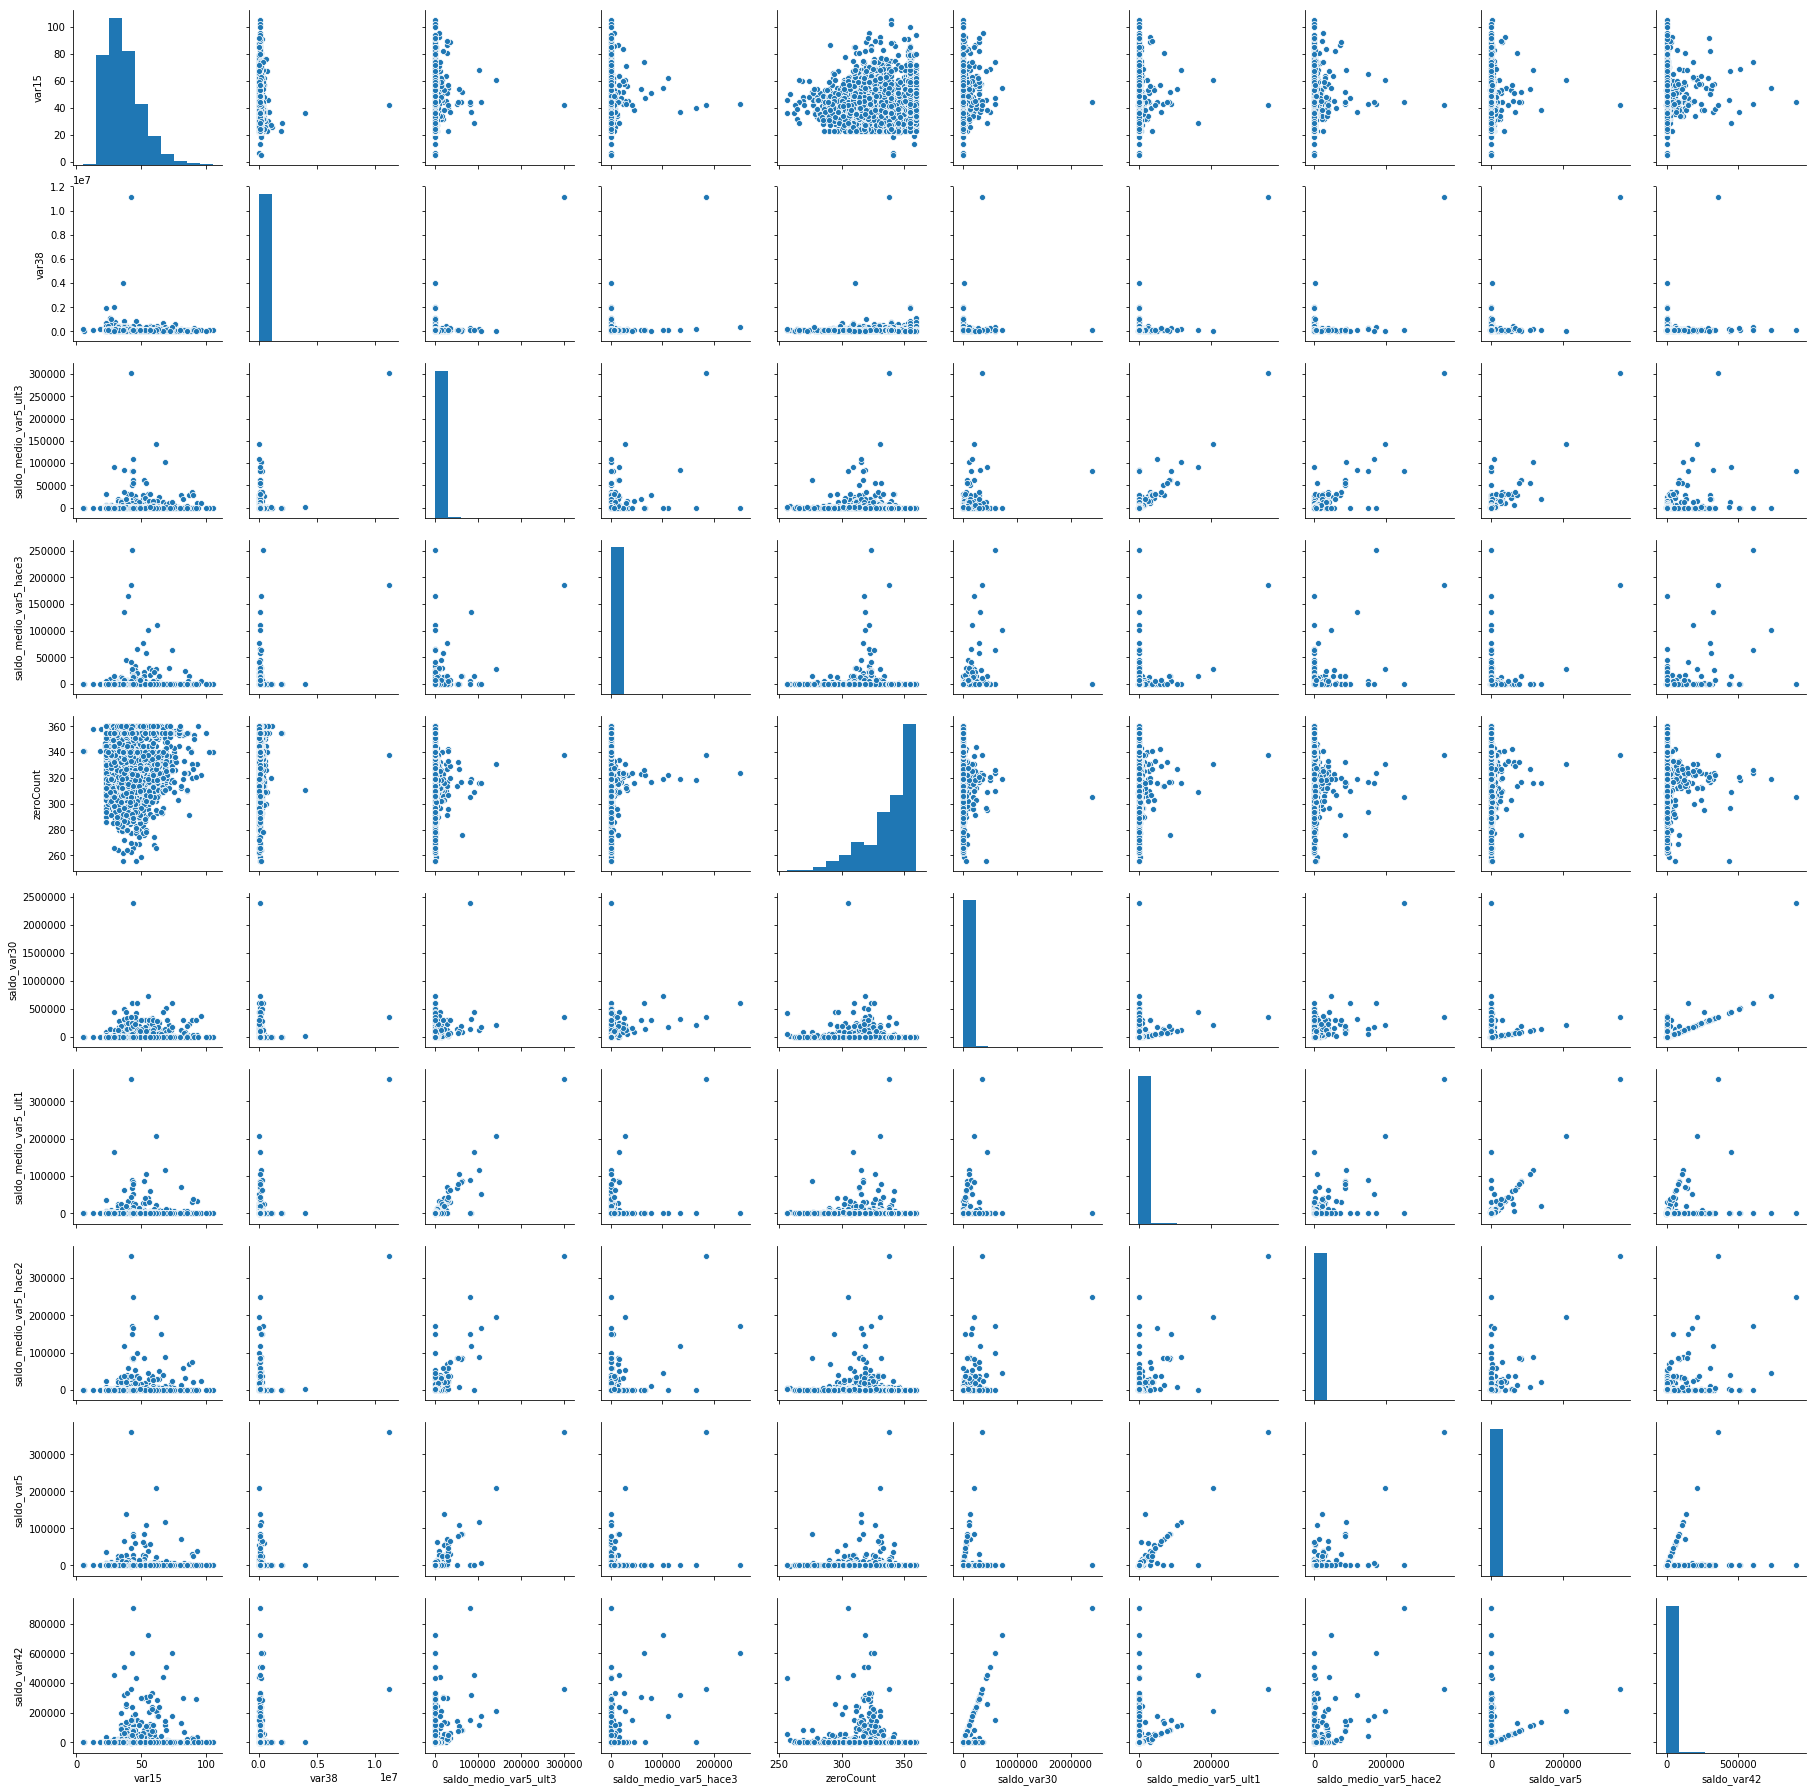

In [171]:
sb.pairplot(df_corr)

## Spearman Rank Correlations

In [173]:
from scipy import stats

var15 = df_corr['var15']
var38 = df_corr['var38']
saldo_medio_var5_ult3 = df_corr['saldo_medio_var5_ult3']
saldo_medio_var5_hace3 = df_corr['saldo_medio_var5_hace3']
zeroCount = df_corr['zeroCount']
saldo_var30 = df_corr['saldo_var30']
saldo_medio_var5_ult1 = df_corr['saldo_medio_var5_ult1']
saldo_medio_var5_hace2 = df_corr['saldo_medio_var5_hace2']
saldo_var5 = df_corr['saldo_var5']
saldo_var42 = df_corr['saldo_var42']

In [174]:
spearmanr_coefficient, p_value = stats.spearmanr(saldo_medio_var5_ult1, saldo_medio_var5_ult3)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.986


In [175]:
spearmanr_coefficient, p_value = stats.spearmanr(saldo_medio_var5_hace2, saldo_medio_var5_ult3)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.869


In [176]:
spearmanr_coefficient, p_value = stats.spearmanr(saldo_var5, saldo_medio_var5_ult3)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.947


In [177]:
spearmanr_coefficient, p_value = stats.spearmanr(saldo_var42, saldo_medio_var5_ult3)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.824


In [180]:
spearmanr_coefficient, p_value = stats.spearmanr(saldo_var42, saldo_var30)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.953


In [182]:
spearmanr_coefficient, p_value = stats.spearmanr(saldo_var5, saldo_medio_var5_ult1)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.963


## Chi-Square test for independence

In [181]:
from scipy.stats import chi2_contingency

In [183]:
table = pd.crosstab(saldo_medio_var5_ult1, saldo_medio_var5_ult3)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 3608406.329 p_value 0.000


In [184]:
table = pd.crosstab(saldo_medio_var5_hace2, saldo_medio_var5_ult3)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 3377538.801 p_value 0.000


In [185]:
table = pd.crosstab(saldo_var5, saldo_medio_var5_ult3)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 3045132.374 p_value 0.000


In [186]:
table = pd.crosstab(saldo_var42, saldo_medio_var5_ult3)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 3138567.683 p_value 0.000


In [187]:
table = pd.crosstab(saldo_var5, saldo_medio_var5_ult1)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 3079656.575 p_value 0.000


## Confusion Matrix 
Based on model of Random Forest

In [197]:
from sklearn.metrics import confusion_matrix, classification_report

def conf_matrix(model, features_train, features_test, labels_train, labels_test): 
    clf = model
    clf.fit(features_train,labels_train.values.ravel())
    pred = clf.predict(features_test)
    cnf_matrix = confusion_matrix(labels_test,pred)
    
    fig = plt.figure(figsize = (6,3))
    print("TP", cnf_matrix[1,1,]) 
    print("TN", cnf_matrix[0,0]) 
    print("FP", cnf_matrix[0,1]) 
    print("FN", cnf_matrix[1,0]) 
    sb.heatmap(cnf_matrix, annot=True, linewidths=0.5)
    plt.title("Confusion_matrix: ")
    plt.xlabel("Predicted_class: ")
    plt.ylabel("Real class: ")
    plt.show()
    print("\nClassification Report: ")
    print(classification_report(labels_test,pred))
    

('TP', 655)
('TN', 687)
('FP', 235)
('FN', 228)


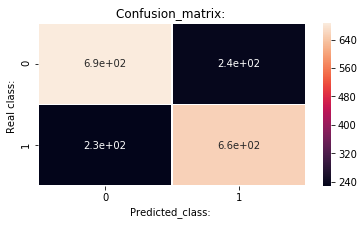


Classification Report: 
             precision    recall  f1-score   support

          0       0.75      0.75      0.75       922
          1       0.74      0.74      0.74       883

avg / total       0.74      0.74      0.74      1805



In [198]:
conf_matrix(random_forest, feature_train, feature_test, target_train, target_test)

### ROC-AUC Curve

In [199]:
from sklearn.metrics import roc_curve

target_scores = random_forest.predict_proba(feature_train)
target_scores = target_scores[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, target_scores)

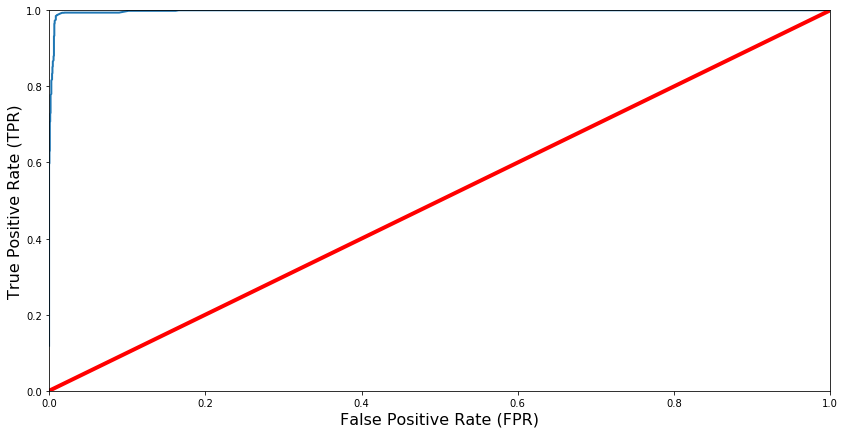

In [200]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

### Precision Recall Curve

In [201]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
target_scores = random_forest.predict_proba(feature_train)
target_scores = target_scores[:,1]

precision, recall, threshold = precision_recall_curve(target_train, target_scores)

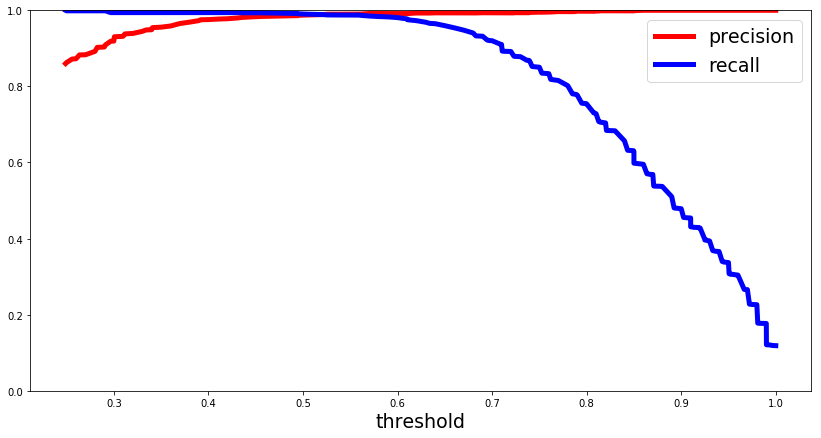

In [202]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

## Submission

In [ ]:
import pickle

def save_model_pickle(estimator, model_url):             
    save_it = model_url
    pickle.dump(estimator, open(save_it, 'wb'))       

submission = pd.DataFrame()
submission['ID'] = id_test
submission['y'] = y_pred

submission.to_csv('satis_sub.csv', index=False)
save_model_pickle(model, 'satis_Model.csv')
